In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

**Dataset Loading**

In [ ]:
# 1. Load data
df = pd.read_csv("/content/drive/MyDrive/diabetes_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

**Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
#Encoding of categorical columns
# Gender encoding
gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
df['gender'] = df['gender'].map(gender_map)

# One-hot encoding for smoking_history
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=False)

# Ensure all dummy columns are integers (0/1)
dummy_cols = [col for col in df.columns if 'smoking_history_' in col]
df[dummy_cols] = df[dummy_cols].astype(int)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gender                       100000 non-null  int64  
 1   age                          100000 non-null  float64
 2   hypertension                 100000 non-null  int64  
 3   heart_disease                100000 non-null  int64  
 4   bmi                          100000 non-null  float64
 5   HbA1c_level                  100000 non-null  float64
 6   blood_glucose_level          100000 non-null  int64  
 7   diabetes                     100000 non-null  int64  
 8   smoking_history_No Info      100000 non-null  int64  
 9   smoking_history_current      100000 non-null  int64  
 10  smoking_history_ever         100000 non-null  int64  
 11  smoking_history_former       100000 non-null  int64  
 12  smoking_history_never        100000 non-null  int64  
 13  

In [ ]:
# Check class distribution
print(df['diabetes'].value_counts())
print("\nClass distribution (%):")
print(df['diabetes'].value_counts(normalize=True) * 100)

diabetes
0    91500
1     8500
Name: count, dtype: int64

Class distribution (%):
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


In [ ]:
# Highly Imbalanced So, applying SMOTE

from imblearn.over_sampling import SMOTE

X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Original y_train distribution:")
print(y_train.value_counts())

# Applying SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("\nBalanced y_train distribution:")
print(y_train_bal.value_counts())

Original y_train distribution:
diabetes
0    73200
1     6800
Name: count, dtype: int64

Balanced y_train distribution:
diabetes
1    73200
0    73200
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_bal.shape, y_train_bal.shape, X_test.shape, y_test.shape


((146400, 13), (146400,), (20000, 13), (20000,))

**Model Implementation**

In [ ]:
gnb = GaussianNB()

# Training on balanced training data
gnb.fit(X_train_bal, y_train_bal)

GaussianNB()

In [ ]:
# Class predictions (0/1)
y_pred = gnb.predict(X_test)
# Probabilities for class 1 (diabetes = 1)
y_prob = gnb.predict_proba(X_test)[:, 1]

**Evaluation**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.80095

ROC-AUC Score: 0.8051237062037929

Confusion Matrix:
 [[14828  3472]
 [  509  1191]]


Confusion Matrix



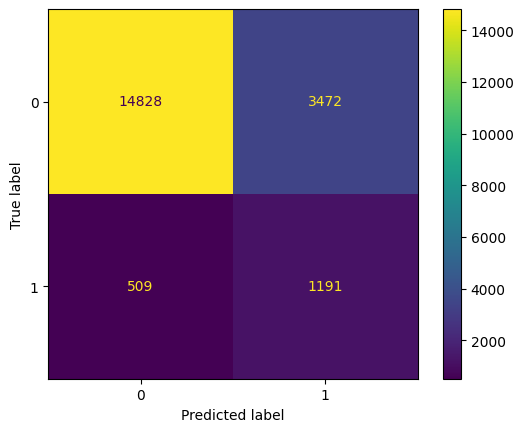

In [ ]:
print("Confusion Matrix\n")
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     18300
           1       0.26      0.70      0.37      1700

    accuracy                           0.80     20000
   macro avg       0.61      0.76      0.63     20000
weighted avg       0.91      0.80      0.84     20000



In [ ]:
# Threshold tuning
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.5, 0.6, 0.7, 0.8]

for thr in thresholds:
    y_pred_thr = (y_prob >= thr).astype(int)

    precision = precision_score(y_test, y_pred_thr)
    recall = recall_score(y_test, y_pred_thr)
    f1 = f1_score(y_test, y_pred_thr)
    cm = confusion_matrix(y_test, y_pred_thr)

    print(f"Threshold: {thr}")
    print(f"  Precision (class 1): {precision:.4f}")
    print(f"  Recall    (class 1): {recall:.4f}")
    print(f"  F1-score  (class 1): {f1:.4f}")
    print("  Confusion Matrix:")
    print(cm)
    print("-" * 40)


Threshold: 0.5
  Precision (class 1): 0.2554
  Recall    (class 1): 0.7006
  F1-score  (class 1): 0.3744
  Confusion Matrix:
[[14828  3472]
 [  509  1191]]
----------------------------------------
Threshold: 0.6
  Precision (class 1): 0.2777
  Recall    (class 1): 0.6888
  F1-score  (class 1): 0.3958
  Confusion Matrix:
[[15254  3046]
 [  529  1171]]
----------------------------------------
Threshold: 0.7
  Precision (class 1): 0.3061
  Recall    (class 1): 0.6671
  F1-score  (class 1): 0.4196
  Confusion Matrix:
[[15729  2571]
 [  566  1134]]
----------------------------------------
Threshold: 0.8
  Precision (class 1): 0.3517
  Recall    (class 1): 0.6424
  F1-score  (class 1): 0.4545
  Confusion Matrix:
[[16287  2013]
 [  608  1092]]
----------------------------------------


Best Threshold is 0.8

In [ ]:
best_threshold = 0.8
y_pred_final = (y_prob >= best_threshold).astype(int)
print("=== FINAL MODEL (Threshold = 0.8) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

=== FINAL MODEL (Threshold = 0.8) ===
Accuracy: 0.86895

Confusion Matrix:
 [[16287  2013]
 [  608  1092]]


In [ ]:
print("=== FINAL CLASSIFICATION REPORT (Threshold = 0.8) ===")
print(classification_report(y_test, y_pred_final))

=== FINAL CLASSIFICATION REPORT (Threshold = 0.8) ===
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     18300
           1       0.35      0.64      0.45      1700

    accuracy                           0.87     20000
   macro avg       0.66      0.77      0.69     20000
weighted avg       0.91      0.87      0.89     20000



=== CONFUSION MATRIX (Threshold = 0.8) ===


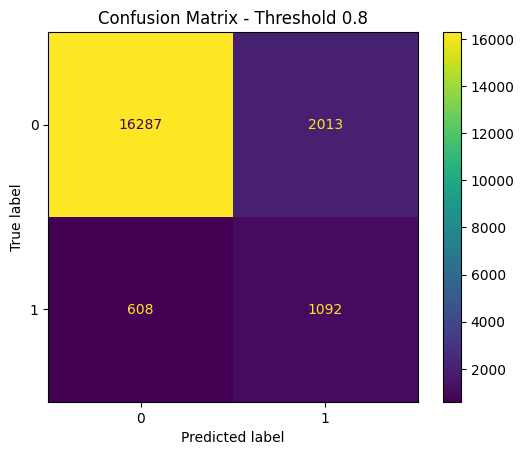

In [ ]:
print("=== CONFUSION MATRIX (Threshold = 0.8) ===")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final)
plt.title("Confusion Matrix - Threshold 0.8")
plt.show()

=== ROC CURVE ===


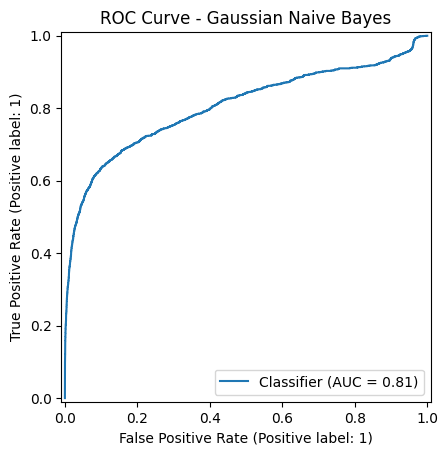

In [ ]:
print("=== ROC CURVE ===")
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - Gaussian Naive Bayes")
plt.show()